In [46]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.metrics import mean_squared_error
from numpy import array
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import pearsonr, kurtosis, skew
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [47]:
df =  pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [48]:
# fungsi sliding window untuk membagi data menjadi input dan output
def sliding_window(data, window_size, step_size):
    X = []
    y = []
    for i in range(0, len(data) - window_size, step_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

In [49]:
# fungsi untuk membuat staistical features, untuk meningkatkan akurasi model
def create_features(data):
    X = []
    for i in range(len(data)):
        X.append([np.mean(data[i]), np.std(data[i]), np.median(data[i]), np.min(data[i]), np.max(data[i]), kurtosis(data[i]), skew(data[i])])
    return np.array(X)

In [50]:
# model untuk MLP (Multi Layer Perceptron)
def mlp_model(X_train, y_train, X_test, y_test):
    mlp = MLPRegressor(random_state=42, max_iter=1000)
    mlp.fit(X_train, y_train)
    # get the prediction
    y_pred = mlp.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    # return rmse, correlation, and prediction
    return rmse, corr, y_pred

In [51]:
# model untuk KNN (K-Nearest Neighbors)
def knn_model(X_train, y_train, X_test, y_test):
    knn = KNeighborsRegressor(n_neighbors=3)
    knn.fit(X_train, y_train)
    # get the prediction
    y_pred = knn.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    # return rmse, correlation, and prediction
    return rmse, corr, y_pred

In [52]:
# model untuk decision tree
def dt_model(X_train, y_train, X_test, y_test):
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X_train, y_train)
    # get the prediction
    y_pred = dt.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    # return rmse, correlation, and prediction
    return rmse, corr, y_pred

In [53]:
# model untuk SVR (Support Vector Regression)
def svr_model(X_train, y_train, X_test, y_test):
    svr = SVR(kernel='rbf')
    svr.fit(X_train, y_train)
    # get the prediction
    y_pred = svr.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    # return rmse, correlation, and prediction
    return rmse, corr, y_pred

In [54]:
# model untuk Random Forest
def rf_model(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    # get the prediction
    y_pred = rf.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    # return rmse, correlation, and prediction
    return rmse, corr, y_pred

In [55]:
# persiapkan dataset untuk forecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [56]:
# preprocessing data cek missing value
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [57]:
# karena prediksi berbasis waktu, maka kita konversi kolom Date menjadi index dan berdasarkan open dan close
df['Date'] = pd.to_datetime(df['Date'])

In [58]:
# split data menjadi 80% training dan 20% testing
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# ambil data open dan close
train_open = train_data['Open'].values
train_close = train_data['Close'].values
test_open = test_data['Open'].values
test_close = test_data['Close'].values

# model forecasting untuk memprediksi target (close) 2 hari kedepan, dengan menggunakan data close 7 hari sebelumnya
window_size = 7
step_size = 1
X_train, y_train = sliding_window(train_close, window_size, step_size)
X_test, y_test = sliding_window(test_close, window_size, step_size)

# buat statistical features
X_train = create_features(X_train)
X_test = create_features(X_test)

In [59]:
# model forecasting
rmse_mlp, corr_mlp, y_pred_mlp = mlp_model(X_train, y_train, X_test, y_test)
rmse_knn, corr_knn, y_pred_knn = knn_model(X_train, y_train, X_test, y_test)
rmse_dt, corr_dt, y_pred_dt = dt_model(X_train, y_train, X_test, y_test)
rmse_svr, corr_svr, y_pred_svr = svr_model(X_train, y_train, X_test, y_test)
rmse_rf, corr_rf, y_pred_rf = rf_model(X_train, y_train, X_test, y_test)

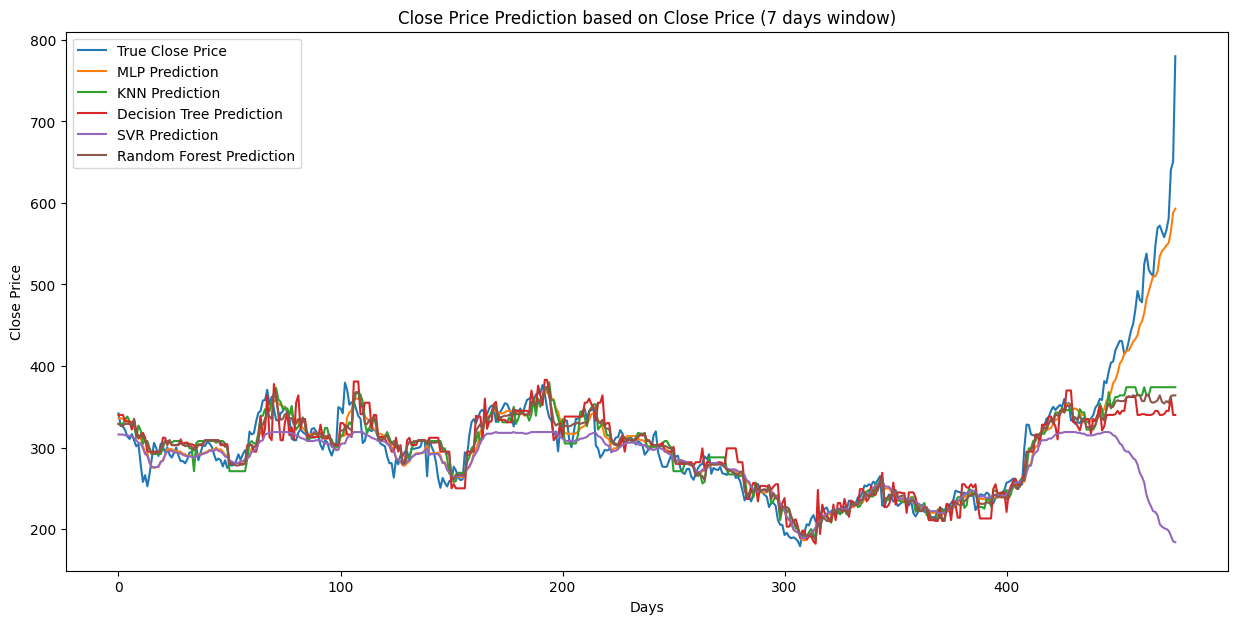

In [63]:
# visualisasi hasil prediksi
plt.figure(figsize=(15, 7))
plt.plot(test_close[window_size:], label='True Close Price')
plt.plot(y_pred_mlp, label='MLP Prediction')
plt.plot(y_pred_knn, label='KNN Prediction')
plt.plot(y_pred_dt, label='Decision Tree Prediction')
plt.plot(y_pred_svr, label='SVR Prediction')
plt.plot(y_pred_rf, label='Random Forest Prediction')
plt.ylabel('Close Price')
plt.xlabel('Days')
plt.title('Close Price Prediction based on Close Price (7 days window)')
plt.legend()

In [61]:
# hasil evaluasi model
print('------------------------------------------------')
print('MLP RMSE: ', rmse_mlp)
print('MLP Correlation: ', corr_mlp)
print('------------------------------------------------')
print('KNN RMSE: ', rmse_knn)
print('KNN Correlation: ', corr_knn)
print('------------------------------------------------')
print('Decision Tree RMSE: ', rmse_dt)
print('Decision Tree Correlation: ', corr_dt)
print('------------------------------------------------')
print('SVR RMSE: ', rmse_svr)
print('SVR Correlation: ', corr_svr)
print('------------------------------------------------')
print('Random Forest RMSE: ', rmse_rf)
print('Random Forest Correlation: ', corr_rf)
print('------------------------------------------------')

------------------------------------------------
MLP RMSE:  20.0512372514585
MLP Correlation:  0.9651668899071434
------------------------------------------------
KNN RMSE:  43.95170015426645
KNN Correlation:  0.8168076699346685
------------------------------------------------
Decision Tree RMSE:  50.240259367756394
Decision Tree Correlation:  0.7325098253152688
------------------------------------------------
SVR RMSE:  74.01345057868706
SVR Correlation:  0.29830740231931496
------------------------------------------------
Random Forest RMSE:  45.831997985965614
Random Forest Correlation:  0.7976222966255845
------------------------------------------------


# MLP yang Terbaik dalam memprediksi target (close) 2 hari kedepan, dengan menggunakan data close7 hari sebelumnya